In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
import pickle

In [2]:
columns = ['Date', 'WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8', 'WSR9', 
           'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 
           'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 
           'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 
           'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 
           'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 
           'SLP', 'SLP_', 'Precp', 'class']
data = pd.read_csv('./Datasets/onehr.data.csv', delimiter=',', names=columns)
df = pd.DataFrame(data)
df.head()

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [3]:
df = df.replace('?', np.nan)

In [4]:
df.isnull().sum()

Date       0
WSR0     299
WSR1     292
WSR2     294
WSR3     292
        ... 
TT       125
SLP       95
SLP_     159
Precp      2
class      0
Length: 74, dtype: int64

In [5]:
df.drop(['Date'], axis=1, inplace=True)
df

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,class
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,...,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [6]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','class']


In [7]:
df.isnull().sum()

WSR0     0
WSR1     0
WSR2     0
WSR3     0
WSR4     0
        ..
TT       0
SLP      0
SLP_     0
Precp    0
class    0
Length: 73, dtype: int64

In [8]:
print(f'Total Records: {df.shape[0]}')
amount_normal = df.loc[df['class'] == 0].shape[0]
amount_ozone = df.loc[df['class'] == 1].shape[0]
print(f'Normal Records: {amount_normal}')
print(f'Ozone Records: {amount_ozone}')

Total Records: 2536
Normal Records: 2463
Ozone Records: 73


In [9]:
X=df.iloc[:,0:72]
Y=df.iloc[:,72]

In [10]:
from sklearn.preprocessing import StandardScaler
scale_X = StandardScaler()
X = scale_X.fit_transform(X)

In [11]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X, Y= oversample.fit_resample(X, Y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=72)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[4.55263101e-01 1.79490094e-01 6.20890497e-02 4.39142669e-02
 3.80372007e-02 3.06772260e-02 2.20456432e-02 1.86782785e-02
 1.49541086e-02 1.32032659e-02 1.17121711e-02 1.04941979e-02
 9.62035298e-03 8.98948118e-03 7.80544193e-03 7.05386850e-03
 6.52917619e-03 5.71851195e-03 5.11381307e-03 4.11808251e-03
 3.74500991e-03 3.68340839e-03 3.30909023e-03 2.68702130e-03
 2.50299173e-03 2.35030144e-03 2.29224284e-03 1.98757192e-03
 1.76355952e-03 1.71760246e-03 1.58430874e-03 1.49006806e-03
 1.41688901e-03 1.34103970e-03 1.25587781e-03 1.11275350e-03
 1.04875268e-03 9.73407411e-04 9.09323861e-04 8.65375670e-04
 7.85584561e-04 7.52257231e-04 6.90483518e-04 6.59112467e-04
 5.73228860e-04 5.63225149e-04 4.95030754e-04 2.56581790e-04
 2.41771682e-04 2.12888949e-04 1.72051876e-04 1.64028830e-04
 1.29953770e-04 1.04429273e-04 8.37656735e-05 8.03547835e-05
 6.20070134e-05 5.67623349e-05 5.17991748e-05 4.58053283e-05
 4.12559283e-05 3.62145510e-05 3.23019735e-05 3.00991605e-05
 2.72608843e-05 2.393856

In [14]:
from sklearn.svm import SVC
classifier = SVC( kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [15]:
Y_pred = classifier.predict(X_test)

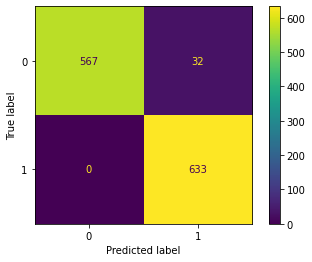

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, auc, precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, Y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot()
path = r"D:\College HW\ML\Project\Ozone-Level-Detection\Images"
plt.savefig(r"{}\SVM_CONFmat.png".format(path))
plt.show()

In [17]:
accuracy_score(y_test, Y_pred)

0.974025974025974

In [18]:
accu = accuracy_score(y_test, Y_pred)
pres = precision_score(y_test,Y_pred)
rec = recall_score(y_test,Y_pred)
f1s = f1_score(y_test,Y_pred)
sens = cm[1][1]/(cm[1][1]+cm[1][0])
spec = cm[0][0]/(cm[0][1]+cm[0][0])
print("Accuracy: ", accu)
print("Precision: ", pres)
print("Recall: ", rec)
print("F1: ", f1s)
print("Sensitivity ", sens)
print("Specificity: ", spec)

Accuracy:  0.974025974025974
Precision:  0.9518796992481203
Recall:  1.0
F1:  0.9753466872110941
Sensitivity  1.0
Specificity:  0.9465776293823038


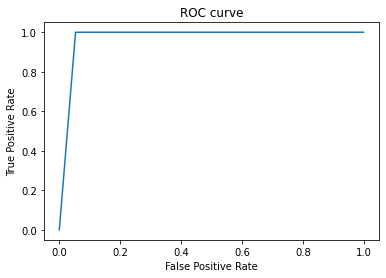

AUC value is 0.9732888146911519 


In [19]:
fpr, tpr, threshold= roc_curve(y_test, Y_pred, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
path = r"D:\College HW\ML\Project\Ozone-Level-Detection\Images"
plt.savefig(r"{}\SVM_AUC.png".format(path))
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

In [20]:
filename = r'D:\College HW\ML\Project\Ozone-Level-Detection\Models'
pickle.dump(classifier , open(r'{}\SVM.sav'.format(filename), 'wb'))

In [22]:
classifier = pickle.load(open(r'{}\SVM.sav'.format(filename), 'rb'))
Y_pred = classifier.predict(X_test)
accuracy_score(y_test, Y_pred)

0.974025974025974